In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
(0.654-0.632)/0.654

0.03363914373088688

In [22]:
654*(1-0.03363914373088688)

632.0

In [15]:
# Data for the dataframe
data = {
    'Model': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'],
    'Type': ['Supervised', 'Supervised', 'Supervised', 'Supervised', 'Supervised', 'Supervised', 'Supervised', 'Supervised', 'Control'],
    'Features': ['Cell Count',  'Cell Painting', 'ChemProp', 'Gene Expression', 'Late fusion (cs,ge)', 'Late fusion (cs,ge,mobc)', 'Late fusion (cs,mobc)', 'Late fusion (ge,mobc)', 'y-scrambling'],
    'Mean AUC': [0.632, 0.626, 0.609, 0.587, 0.638, 0.654, 0.644, 0.648, 0.502],
    'AUC Std Dev': [0.20, 0.224, 0.223, 0.196, 0.195, 0.208, 0.232, 0.202, 0.067],
    'AUC = 1.0': [11, 13, 5, 11, 9, 14, 15, 14, 1],
    'AUC > 0.9': [25, 28, 16, 19, 18, 28, 31, 28, 2],
    'AUC > 0.8': [96, 102, 102, 71, 109, 117, 124, 108, 5],
    'AUC > 0.5': [205, 197, 194, 188, 206, 205, 204, 211, 91]
}

# Create DataFrame
df = pd.DataFrame(data)
df

,Model,Type,Features,Mean AUC,AUC Std Dev,AUC = 1.0,AUC > 0.9,AUC > 0.8,AUC > 0.5
0,a,Supervised,Cell Count,0.632,0.200,11,25,96,205
1,b,Supervised,Cell Painting,0.626,0.224,13,28,102,197
2,c,Supervised,ChemProp,0.609,0.223,5,16,102,194
3,d,Supervised,Gene Expression,0.587,0.196,11,19,71,188
4,e,Supervised,"Late fusion (cs,ge)",0.638,0.195,9,18,109,206
5,f,Supervised,"Late fusion (cs,ge,mobc)",0.654,0.208,14,28,117,205
6,g,Supervised,"Late fusion (cs,mobc)",0.644,0.232,15,31,124,204
7,h,Supervised,"Late fusion (ge,mobc)",0.648,0.202,14,28,108,211
8,i,Control,y-scrambling,0.502,0.067,1,2,5,91


In [23]:
96/102

0.9411764705882353

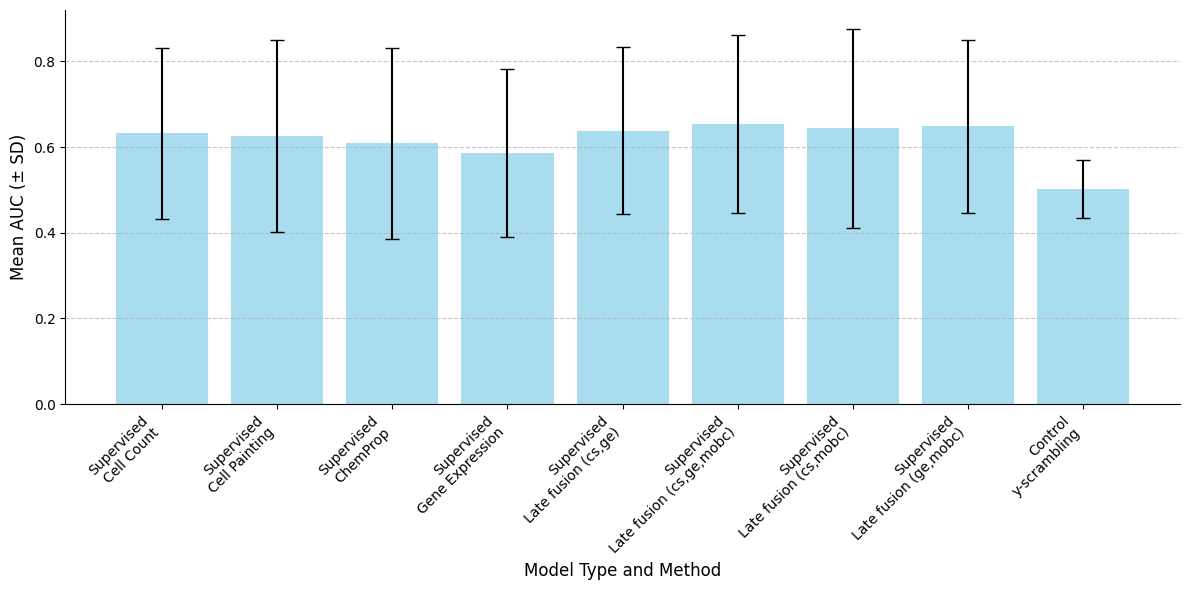

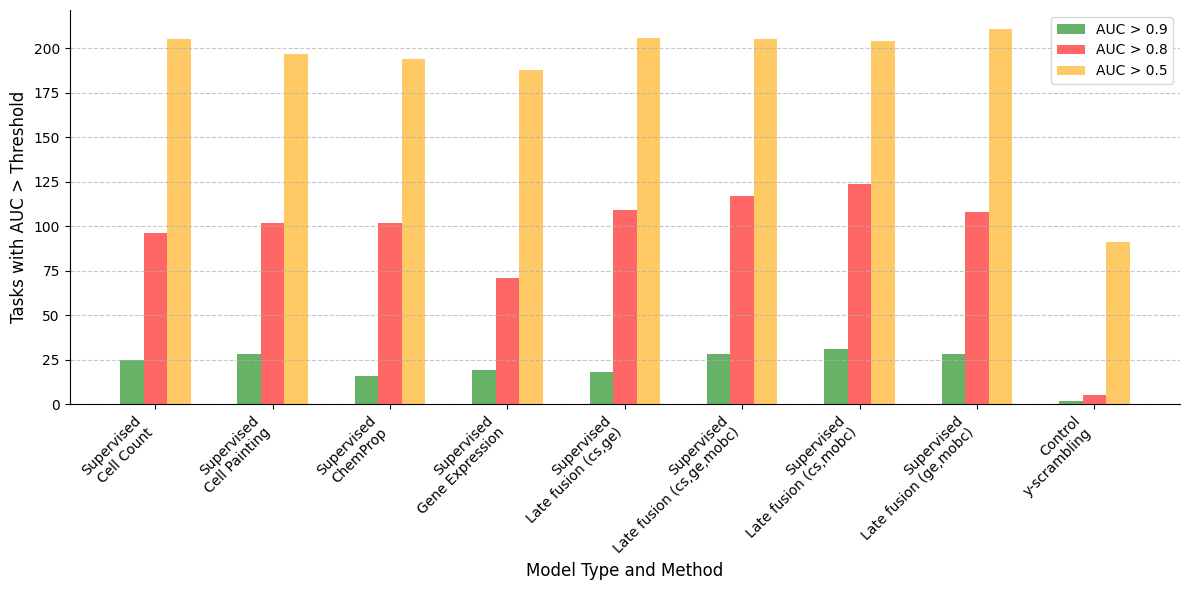

In [16]:
# Create the DataFrame
data = {
    'Model': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'],
    'Type': ['Supervised', 'Supervised', 'Supervised', 'Supervised', 'Supervised', 'Supervised', 'Supervised', 'Supervised', 'Control'],
    'Features': ['Cell Count', 'Cell Painting', 'ChemProp', 'Gene Expression', 'Late fusion (cs,ge)', 'Late fusion (cs,ge,mobc)', 'Late fusion (cs,mobc)', 'Late fusion (ge,mobc)', 'y-scrambling'],
    'Mean AUC': [0.632, 0.626, 0.609, 0.587, 0.638, 0.654, 0.644, 0.648, 0.502],
    'AUC Std Dev': [0.20, 0.224, 0.223, 0.196, 0.195, 0.208, 0.232, 0.202, 0.067],
    'AUC = 1.0': [11, 13, 5, 11, 9, 14, 15, 14, 1],
    'AUC > 0.9': [25, 28, 16, 19, 18, 28, 31, 28, 2],
    'AUC > 0.8': [96, 102, 102, 71, 109, 117, 124, 108, 5],
    'AUC > 0.5': [205, 197, 194, 188, 206, 205, 204, 211, 91]
}

df = pd.DataFrame(data)

# Prepare data for plotting
import numpy as np
import matplotlib.pyplot as plt

# Ensure numerical columns for thresholds
df['AUC = 1.0'] = pd.to_numeric(df['AUC = 1.0'], errors='coerce')
df['AUC > 0.9'] = pd.to_numeric(df['AUC > 0.9'], errors='coerce')
df['AUC > 0.8'] = pd.to_numeric(df['AUC > 0.8'], errors='coerce')
df['AUC > 0.5'] = pd.to_numeric(df['AUC > 0.5'], errors='coerce')

# Create model indices and labels
new_model_indices = np.arange(len(df['Type']))
new_x_labels = [f"{t}\n{m}" for t, m in zip(df['Type'], df['Features'])]

# First plot: Mean AUC with error bars
plt.figure(figsize=(12, 6))
plt.bar(new_model_indices, df['Mean AUC'], yerr=df['AUC Std Dev'], color='skyblue', capsize=5, alpha=0.7)
plt.xlabel('Model Type and Method', fontsize=12)
plt.ylabel('Mean AUC (± SD)', fontsize=12, color='black')
plt.xticks(new_model_indices, new_x_labels, rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Second plot: AUC thresholds
plt.figure(figsize=(12, 6))
width = 0.2
plt.bar(new_model_indices - width, df['AUC > 0.9'], width, label='AUC > 0.9', color='green', alpha=0.6)
plt.bar(new_model_indices, df['AUC > 0.8'], width, label='AUC > 0.8', color='red', alpha=0.6)
plt.bar(new_model_indices + width, df['AUC > 0.5'], width, label='AUC > 0.5', color='orange', alpha=0.6)
plt.xlabel('Model Type and Method', fontsize=12)
plt.ylabel('Tasks with AUC > Threshold', fontsize=12, color='black')
plt.xticks(new_model_indices, new_x_labels, rotation=45, ha="right")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [14]:
new_model_indices

array([0, 1, 2, 3, 4, 5, 6, 7, 8])